# TP 5

## 1.1. Preprocesamiento de datos

1. A la hora de preparar los datos antes de ser entrenados existen tres acciones basicas a realizar, explique en que consiste cada una de las siguientes y como se implementarian en Python:
  - a) Mean subtraction
  - b) Normalization
  - c) Scaling


## 1.1.1.a Mean subtraction

La estandarización de conjuntos de datos es un requisito común para muchos estimadores de máquinas de  aprendizaje. Estos podrían comportarse mal si las características individuales no se parecen más o menos a una distribución normal Gaussiano con media cero y varianza uno. A esa forma se tratan de llevar los datos de entrenamiento.

Mean subtraction es una técnica para procesar datos en la cual los transformamos para centrarlos, eliminando el valor medio de cada característica y luego escalándolos dividiendo las características no constantes por su desviación estándar.

Muchos algoritmo de aprendizaje (como el núcleo RBF de Support Vector Machines o los regularizadores l1 y l2 de modelos lineales) asumen que todas las características están centradas alrededor de cero y tienen variación en el mismo orden. Si una característica tiene una varianza que es de orden de magnitud mayor que otros, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba.

La función scale proporciona una forma rápida y sencilla de realizar esta operación en un solo conjunto de datos tipo array:

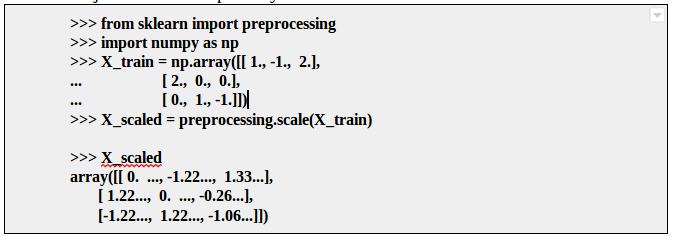

Los datos escalados con media cero y varianza unitaria:

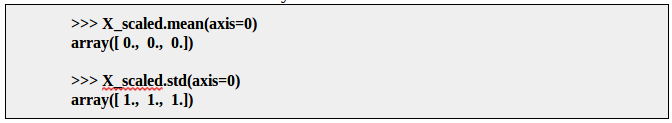

#### http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

## 1.1.1.b Normalization
https://docs.microsoft.com/es-es/azure/machine-learning/team-data-science-process/prepare-data

La normalización de datos escala los valores numéricos a un intervalo especificado. 
Entre los métodos de normalización de datos más conocidos se incluyen:
  - Normalización mínima-máxima
  - Normalización de puntuación z
  - Escalado decimal

### Normalización mínima maxima
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Transforma linealmente los datos a un intervalo, por ejemplo, entre 0 y 1, donde el valor mímino se escala a 0 y el máximo a 1.


In [ ]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()

scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.data_max_

scaler.transform(data)


### Normalización de puntuación z
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.zscore.html

Escale los datos en función de la desviación estándar y media: divida la diferencia entre los datos y la media por la desviación estándar.

In [ ]:
a = np.array([ 0.7972,  0.0767,  0.4383,  0.7866,  0.8091,  0.1954,
                   0.6307, 0.6599,  0.1065,  0.0508])
from scipy import stats
stats.zscore(a)

### Escalado decimal
Escala los datos moviendo la coma decimal del valor del atributo.

## 1.1.1.c Scaling
Es una  técnica que se basa en redimensionar la frecuencia de muestreo de un  valor mayor  a un  valor menor. De esta manera podría usarse una  regla  de decisión  de acuerdo a la cantidad de información  contenida  en  la frecuencia mayor  dentro de cada intervalo de la frecuencia menor para elegir si la observación será una medida de  tendencia  de las observaciones  existentes o se  considerará un vacío  en la información. 

El scaling [http://scikit-learn.org] es un tipo de estandarización alternativa en la que existe un rango de valores situados entre un valor mínimo y máximo dado, a menudo entre cero y uno, o de manera que el valor absoluto máximo de cada característica se escala al tamaño de la unidad. Esto se puede lograr usando MinMaxScaler o MaxAbsScaler, respectivamente.


In [ ]:
from sklearn import preprocessing

In [ ]:
x = np.array([
    [1,2,3],
    [2,1,2],
    [5,4,3],
    [10,100,15]
])

In [ ]:
x

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)
x

## PCA
1.1.2. Cuando trabajamos con datos de muchas dimensiones, suele ser necesario reducir esta dimensionalidad sin perder mucha informacion de nuestros datos, una opcion para realizar esto es aplicar PCA sobre los mismos.
  - a ) Aplique PCA sobre el dataset otto.
  - b) Cuantos componentes se deben usar para explicar la variabilidad del 70 % y 80 % de los datos.
  - c) Grafique los primeros dos PCs

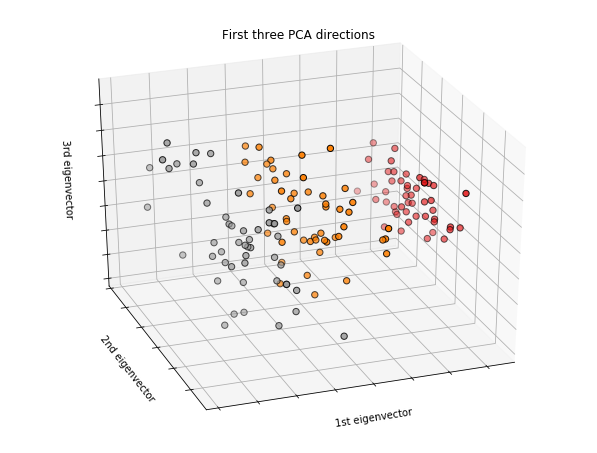

In [18]:
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
pca.explained_variance_ratio_
pca.singular_values_

## 1.2. Introduccion a aprendizaje automatico
  - 1) Dentro del aprendizaje automatico, contamos con varias áreas de aplicación, entre ellas podemos encontrar: clasificación, regresiones, clustering y reducción de dimensiones. Explique que problemas resuelven los métodos que se encuentran dentro de estas áreas, explique un método dentro de cada una de ellas y de una posible aplicación.
  - 2) La cantidad de datos disponibles para entrenamiento pueden condicionar la elección de algún método sobre otro? y el tipo de dato?
  - 3) En la implementación cual es el pipe utilizado para analizar datos con una SVM? Explique parametros y función de cada paso.

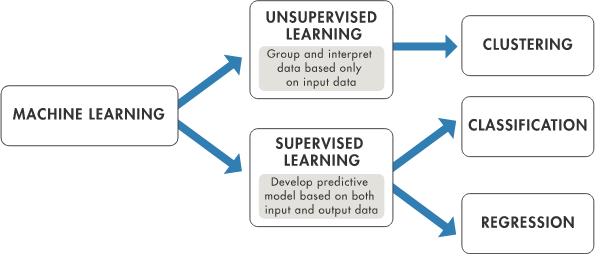

### 1-2-1 Clasificación: 
Un sistema de clasificación predice una categoría. Los modelos de clasificación organizan los datos de entrada en categorías. 

• Bagging: Se basa en perturbar la composición de los datos del conjunto de aprendizaje. Con cada conjunto de datos se entrena un clasificador base y entonces se obtiene la respuesta final para una nueva instancia, mediante un esquema de votación en el que intervienen todos los clasificadores entrenados (por ejemplo, voto por mayoría) • Este procedimiento reduce la porción del error en la precisión del clasificador que se  puede imputar a la variabilidad asociada a los conjuntos de entrenamiento
• Boosting: En este caso se trata de entrenar distintos clasificadores que complementen a otros. Un primer clasificador se entrona, y las instancias  sobre las que este clasificador comete errores, se les adjudica un peso mayor que los ejemplos clasificados correctamente. Entonces, un nuevo clasificador (posiblemente diferente) se entrena con los mismos datos de
entrenamiento pero centrándose en los ejemplos con más peso, y así, sucesivamente.

Algunos algoritmos habituales para realizar la clasificación son: máquina de vectores de soporte (SVM), árboles de decisión boosted y bagged, k-vecino más cercano, clasificadores bayesianos (Naïve Bayes), análisis discriminante, regresión logística y redes neuronales.

Ejemplo:
Un ejemplo de aplicación sería catalogar imágenes para generar álbumes en base a coordenadas.
Las aplicaciones más habituales son las imágenes médicas, el reconocimiento de voz y la calificación crediticia.

### 1-2-1 Regresión: 
Regresión simple: Consiste en describir la relación entre las dos variables mediante una recta.
Regresión logística: En algunas ocasiones, la variable respuesta no es una variable continua sino que se sabe que tiene una distribución discreta como puede ser una Poisson o una Binomial.
Regresión múltiple: Un método multivariado para determinar una ecuación de regresión o predicción para predecir un valor de la variable dependiente a partir de un conjunto de variables independientes.

Las técnicas de regresión predicen respuestas continuas; por ejemplo, cambios de temperatura o fluctuaciones en la demanda energética. Las aplicaciones más habituales son la predicción de la carga eléctrica y el trading algorítmico.

Los algoritmos más habituales son: modelo lineal, modelo no lineal, regularización, regresión por pasos, árboles de decisión boosted y bagged, redes neuronales y aprendizaje neurodifuso adaptativo.

Ejemplos:
una regresión predice un número, como por ejemplo cuál va a ser el precio de un artículo, o el número de ventas de determinados pasajes en una aerolínea.
Otro ejemplo, determinar el valor de una propiedad en base a atributos.
Un grupo de 20 alumnos estuvieron entre 0 y 6 horas estudiando para un examen. Nos preguntamos cómo el número de horas estudiando para un examen afecta la probabilidad del alumno de pasar el examen?

### 1-2-1 Clustering: 
Un cluster es por tanto una colección de objetos que son “similares” entre ellos y “diferentes” a los objetos que pertenecen a otros clusters

• Agrupamiento exclusivo: En este caso los datos se agrupan de un modo exclusivo, de modo que si un dato pertenece a un cluster entonces no puede estar incluido en otro. Un ejemplo de este tipo de algoritmos es el algoritmo K‐Means
• Agrupamiento solapado: En este caso se utilizan conjuntos difusos para agrupar los datos, de forma que cada punto puede pertenecer a dos o más clusters con diferentes grados de pertenencia. El ejemplo más representativo de este tipo de algoritmos es el algoritmo Fuzzy C‐means
• Agrupamiento jerárquico: Este tipo de algoritmos se basa en la unión sucesiva de los dos clusters más próximos. La condición inicial se establece fijando cada dato como un cluster y después de cierto número de iteraciones se consigue un árbol o dendograma, donde cada nivel proporciona un agrupamiento de los datos. Dentro de este tipo se encuentra
cualquier versión del algoritmo Hierarchical clustering
• Agrupamiento probabilista: En esta caso se utiliza una aproximación completamente probabilista para resolver el problema y el ejemplo más representativo es la mezcla de Gaussianas (Mixture of Gaussians)

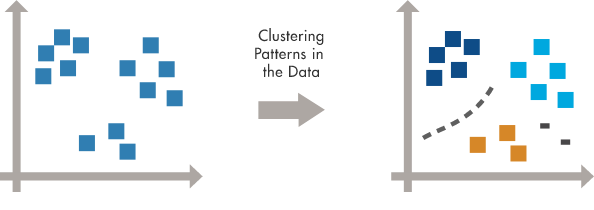

Algunos algoritmos habituales para realizar el clustering son: k-means y k-medoids, clustering jerárquico, modelos de mezclas gaussianas, modelos de Markov ocultos, mapas autoorganizados, clustering difuso de c-means y clustering sustractivo.

Ejemplos de clustering: 
    Agrupar genes y proteínas con similar funcionalidad.
    Agrupar documentos para explorarlos más rápido
    Agrupar condiciones climáticas para distribución de los biomas mundiales
    

### 1-2-1 Reducción de la dimensión:
Es el proceso de reducción del número de variables aleatorias que se trate y se puede dividir en selección de función y extracción de función.
Los métodos de reducción de dimensionalidad son técnicas algorítmicas que se basan en el mapeado de un conjunto de datos dado en n dimensiones en un subespacio derivado del espacio original de m dimensiones siendo m<n, lo que nos permite encontrar una descripción de los datos a un coste menor. 
Las técnicas más utilizadas es el PCA --> 
. El método PSA trata de representar un conjunto de datos en un sub-espacio lineal de dimensionalidad reducida de forma que este aún describe de forma aceptable la varianza de los datos, es decir, que tratamos de encontrar una base lineal que reduzca la dimensionalidad de los datos donde la cantidad de la varianza sea máxima. En términos matemáticos, podemos decir que PCA, intenta encontrar un mapeado lineal M entre dos espacios de coordenadas tal que se maximice la función de coste. 

El método LLE (acrónimo del inglés Locally linear embedding) es un algoritmo de aprendizaje
no supervisado que fue propuesto por . Este algoritmo es capaz de calcular una representación
de baja dimensión manteniendo, en la representación de vecindad, suficiente información de cómo estaban los
nodos distribuidos en el espacio de entrada.

Mapas de difusión:
Los mapas de difusión se basan en la definición de Markov de camino  aleatorio en el grafo de los datos. Realizando el camino aleatorio para el número de iteraciones, se mide la proximidad de los puntos de datos obtenidos. En la representación de baja dimensión de los datos las distancias de difusión de las parejas se retienen tan bien como es posible. La idea clave detrás de la difusión de distancias es que se basa en integrar sobre todos los caminos a través del grafo. Los mapas de difusión preservan la proximidad local entre puntos de datos construyendo una representación en forma de grafo de la estructura subyacente. Los vértices o nodos de este gráfico representan los puntos de datos, y los bordes conectando los vértices, representan similitudes entre nodos adyacentes. Si es normalizado adecuadamente, estos pesos de las aristas pueden ser interpretados como la probabilidad de un recorrido concreto sobre el grafo. Después representa el gráfico como una matriz, donde las propiedades espectrales de esta matriz se utilizan para embeber los puntos de datos en un espacio de menor dimensionalidad, habitualmente un espacio tridimensional. Los métodos que utilizan mapas de difusión son por tanto especialmente interesantes cuando nos interesa realizar un estudio profundo de la topología de los datos, para descubrir interrelaciones ocultas o inferir reglas sobre el conjunto a partir del estudio del subespacio reducido.

Un ejemplo de la aplicación es el reconocimiento de caras en imágenes, mediante la distinción de variabilidad de las diferentes  caras. 


### 1-2-2
Aprendizaje supervisado:
En la regresión: Utilice técnicas de regresión si trabaja con un intervalo de datos o si la naturaleza de la respuesta es un número real, como la temperatura o el tiempo que tardará una pieza de equipamiento en fallar.
En la clasificación: Utilice la clasificación si sus datos se pueden etiquetar, categorizar o dividir en grupos o clases concretos. 

si es necesario explorar  datos y se desea entrenar un modelo para localizar una buena representación interna, como la división de datos en clusters debe utilizarse aprendizaje no supervisado. 
##### Respuesta
La cantidad de datos no influye, en la selección del método a aplicar. La mayoría de algoritmos de análisis de datos requieren cerca de 100 ejemplos de datos  de entrenamiento. Los conceptos aprendidos o reglas pueden no ser suficientes si los ejemplos
disponibles no son suficientes. 
Por otro lado los tipos de datos si son indicadores de la selección del método a seleccionar. Los atributos o definiciones de los tipos de datos definen el tipo de aprendizaje.

### 1-2-3 imeplementación clasificador SVM en scikit-learn


In [ ]:
import numpy as np
X = np.array([[0, 1,0], [1, 0,0], [1, 1,0], [1, 1,1], [2,2,2], [8,7,3],[9,2,5]]) #Vector de ejemplos
y = np.array([0, 0, 0, 1,1,1,1]) #Vector de etiquetas para clasificar
from sklearn.svm import SVC # se importa Support Vector Clasificación 
clf = SVC()
clf.fit(X, y) #Ajustar el modelo SVM de acuerdo con los datos de entrenamiento dados
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, #Pesos asignados a las características (coeficientes en el problema primario). Esto sólo está disponible en el caso de un núcleo lineal.
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, #max_iter Límite duro de iteraciones dentro del solver, o -1 sin límite., shrinking Si usar la heurística de reducción.
    tol=0.001, verbose=True) #Tolerancia para el criterio de parada.
print(clf.predict([[0,1,0]])) #Predicción

## 1.3. Clustering
1. Describa de los siguientes metodos de clustering cual es la metrica utilizada, sus casos de uso y su escalabilidad en la implementacion.

  - a) K-Means
  - b) Mean-Shift
  - c) Gaussian mixtures

2. Llevar una imagen cualquiera (recibida por linea de comando) a 80 colores con el metodo de clustering K-Means e imprima los porcentajes de estos colores en la imagen resultante. Que aplicacion le darıa a este algoritmo?

3. Aplicar el metodo de Mean-Shift sobre el dataset IRIS.


### 1.3.2 K-Means porcentaje de colores
http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

Este algoritmo puede ser util para comprimir datos. En este ejemplo llevamos una imagen de 96,615 colores a 80 colores. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 80

china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Datos de entrenamiento")
image_array_sample = shuffle(image_array, random_state=0)[:1000]

print("Entrenamos")
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print labels

# a manopla
def get_porcentaje_colores(labels):
    total = len(labels)
    valores = {}
    for l in labels:
        try:
            valores[l] += 1
        except:
            valores[l] = 1
    for k,v in valores.items():
        porcentaje = np.true_divide((v * 100), total)
        valores[k] = "Color: %d = %.3f %%"%(valores[k], porcentaje)
    return valores

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Mostrando la imagen original
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Imagen original (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Imagen cuantificada (80 colors, K-Means)')
imagen_cuantificada = recreate_image(kmeans.cluster_centers_, labels, w, h)
plt.imshow(imagen_cuantificada)
plt.show()
print get_porcentaje_colores(labels)  


## 1.3.3 MeanShift sobre dataset Iris
Ejemplo sacado de:
 - http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py
 
Para ver todas las metricas de Clustering
  - http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
  
Vamos a usar la metrica de la consigna: adjusted_rand_score
  - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Numero de clusters reales 3
Numero de cluster estimados : 2
Resultado 0.56


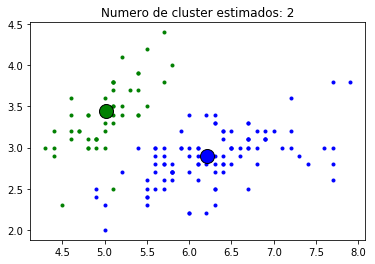

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import MeanShift
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
#Datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Metodo
ms = MeanShift()
# Entrenamos
ms.fit(X)

labels = ms.labels_
labels_unique = np.unique(labels)
cluster_centers = ms.cluster_centers_

n_clusters_ = len(labels_unique)
n_clusters_reales = len(np.unique(y))
print("Numero de clusters reales %d"% (n_clusters_reales))
print("Numero de cluster estimados : %d" % n_clusters_)

validacion = adjusted_rand_score(y, labels)
print("Resultado %.2f"%(validacion))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Numero de cluster estimados: %d' % n_clusters_)
plt.show()

## 1.4. Clasificacion ##

### 1. Comente dos kernels posibles para una SVM, cuales son sus diferencias, y que tan importante es la eleccion de estos a la hora de resolver un problema. ###

### 2. Implemente sobre un mismo dataset a eleccion una SVM con dos kernels diferentes y grafiquelos. Que diferencias encontro? Para que tipo de distribucion es  util un kernel lineal? ###

### 3. Clasifique por calidad a los vinos encontrados en el archivo winequality red.csv, cuales son los valores promedio para obtener un vino de calidad 6?. Grafique la funcion de decision obtenida. Que clasificador utilizo? Realice el mismo analisis con otro metodo y compare. ###

#### http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ ####


### 1.4.1 Comente dos kernels posibles para una SVM, cuales son sus diferencias, y que tan importante es la eleccion de estos a la hora de resolver un problema. ### 

### Función Kernel
La manera más simple de realizar la separación es mediante una línea recta, un plano recto o un hiperplano N-dimensional. Desafortunadamente los universos a estudiar no se suelen presentar en casos idílicos de dos dimensiones, sino que un algoritmo SVM debe tratar con más de dos variables predictoras, curvas no lineales de separación, casos donde los conjuntos de datos no pueden ser completamente separados, clasificaciones en más de dos categorías. 

Debido a las limitaciones computacionales de las máquinas de aprendizaje lineal, éstas no pueden ser utilizadas en la mayoría de las aplicaciones del mundo real. La representación por medio de funciones Kernel ofrece una solución a este problema, proyectando la información a un espacio de características de mayor dimensión el cual aumenta la capacidad computacional de la máquinas de aprendizaje lineal. Es decir, mapearemos el espacio de entradas X a un nuevo espacio de características de mayor dimensionalidad (Hilbert):

### F = {φ(x)|x ∈ X}
### x = {x1, x2, · · ·, xn} → φ(x) = {φ1(x), φ2(x), · · ·, φn(x)}


### Kernel Polinomial 
El kernel Polinomial es un núcleo no estacionario. Los núcleos polinomiales son adecuados para problemas en los que todos los datos de entrenamiento se normalizan.

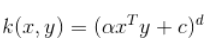

Los parámetros ajustables son la pendiente alpha, el término constante c y el grado polinomial d.

### Kernel Gaussiano 
El kernel gaussiano es un ejemplo de núcleo de función base radial.

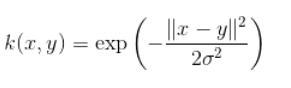

Alternativamente, también podría implementarse utilizando

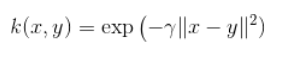

El parámetro ajustable sigma juega un papel importante en el rendimiento del kernel y debe ser cuidadosamente ajustado al problema en cuestión. Si se sobreestima, la exponencial se comportará casi linealmente y la proyección de mayor dimensión comenzará a perder su potencia no lineal. Por otro lado, si se subestima, la función carecerá de regularización y el límite de decisión será altamente sensible al ruido en los datos de entrenamiento.

### Importancia en la elección de un kernel

En la imagen de abajo, los puntos de datos pertenecen a dos clases principales: un anillo interior y un anillo exterior. Su intuición le dirá, correctamente, que estas dos clases no son "linealmente separables". En otras palabras, no podemos trazar una línea recta para dividir las dos clases. Sin embargo, también es intuitivamente claro que un "hiperplano" elíptico o circular puede separar fácilmente las dos clases.

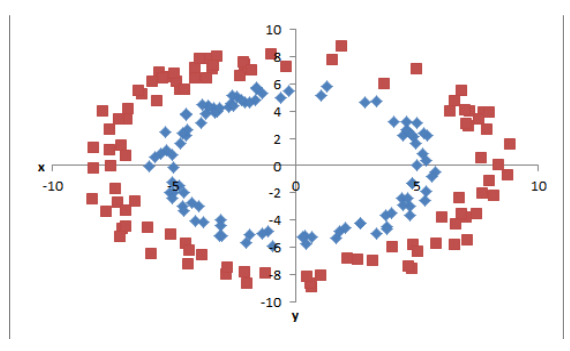

De hecho, si tuviéramos que ejecutar un SVM lineal simple sobre estos datos, obtendríamos una precisión de clasificación de alrededor del 46%. Como se ve en el resultado de abajo, un SVM lineal clasificaría aproximadamente la mitad del anillo interno y la mitad del anillo externo correctamente.

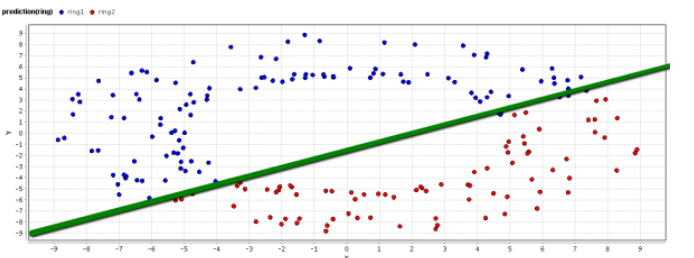

¿Cómo podemos clasificar espacios de características más complejos? Un simple truco sería transformar las dos variables x e y en un nuevo espacio de características que implica x (o y) y una nueva variable z definida como z = sqrt (x ^ 2 + y ^ 2). La representación de z no es más que la ecuación de un círculo. Cuando los datos se transforman de esta manera, el espacio de función resultante que implica x y z aparecerá como se muestra a continuación. Los dos grupos de datos corresponden a los dos radios de los anillos: el interno con un radio medio de alrededor de 5,0 y el grupo exterior con un radio medio de alrededor de 8,0.

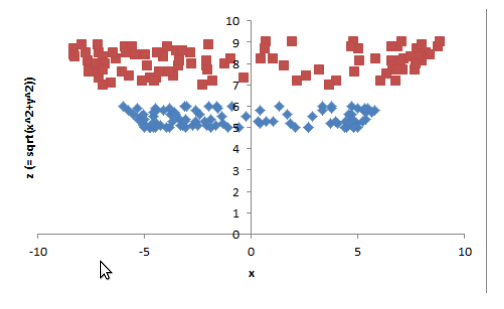

Claramente este nuevo problema en las dimensiones x y z ahora es linealmente separable y podemos aplicar un SVM estándar para hacer la clasificación. Cuando ejecutamos un SVM lineal en estos datos transformados, obtenemos una precisión de clasificación del 100%. Después de clasificar el espacio de función transformado, podemos invertir la transformación para recuperar nuestro espacio de características original.

Las funciones del kernel ofrecen al usuario esta opción de transformar espacios no lineales en lineales. La mayoría de los paquetes que ofrecen SVM incluirán varios núcleos no lineales que van desde simples funciones de base polinómica hasta funciones sigmoides. El usuario no tiene que hacer la transformación de ante mano, pero simplemente tiene que seleccionar la función kernel adecuada y el software se encargará de transformar los datos, clasificándolos y retransformando los resultados en el espacio original.

Desafortunadamente con un gran número de atributos en un dataset es difícil saber qué kernel funcionaría mejor. Las más utilizadas son las funciones de base polinómica y radial. Desde un punto de vista práctico, es una buena idea comenzar con un polinomio cuadrático y variar hasta algunas de las funciones del kernel más exóticas hasta llegar a un nivel de precisión deseado. 

#### https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte#Funci.C3.B3n_Kernel
#### http://www.simafore.com/blog/bid/113227/How-support-vector-machines-use-kernel-functions-to-classify-data



###  1.4.2  Implemente sobre un mismo dataset a eleccion una SVM con dos kernels diferentes y grafiquelos. Que diferencias encontro? Para que tipo de distribucion es util un kernel lineal? ###
#### https://relopezbriega.github.io/blog/2015/10/10/machine-learning-con-python/  ####

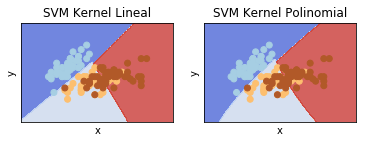

In [11]:
# importanto SVM
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# importando los datasets de sklearn
from sklearn import datasets

# importando el dataset iris
iris = datasets.load_iris()

X = iris.data[:, :2]  # solo tomamos las primeras 2 características
y = iris.target

h = .02  # tamaño de la malla del grafico

# Creando el SVM con sus diferentes métodos
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)
# crear el area para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# titulos de los graficos
titles = ['SVM Kernel Lineal','SVM Kernel Polinomial']

for i, clf in enumerate((svc, poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Graficando tambien los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Las diferencias que podemos encontrar al momento de clasificar datos con un kernel lineal y un kernel polinomial son las siguiente: 
- Como podemos ver en los graficos un kernel lineal solo nos va a ser util cuando la distincion entre las class sea evidente y bien marcada, ya que este kernel va a tratar de dividir las clases haciendo uso de rectas por lo cual si tenemos  valores de clases diferente mezclados en el plano, este kernel va a ser incapaz de poder clasificar esos valores de forma correcta, en cambio un kernel polinomial va a utilizar curvas para poder dividir las clases, pudiendo de esta manera abarcar y separar areas que con simples rectas no se podrian hacer.

### 1.4.3 Clasifique por calidad a los vinos encontrados en el archivo winequality red.csv, cuales son los valores promedio para obtener un vino de calidad 6?. Grafique la funcion de decision obtenida. Que clasificador utilizo? Realice el mismo analisis con otro metodo y compare. ####

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from time import time 
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


# Funciones
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
# abro el dataset
vinos = 'datos/vinos.csv'
df_customer = pd.DataFrame.from_csv(vinos,sep=';', index_col=None)

# filtramos dataset dejando solo los vinos de claidad 6 para sacar promedios
promedios_calidad = (df_customer[df_customer['quality'] == 6]).mean()

# selecciono todas las columnas menos  la ultima, calidad
X = df_customer[df_customer.columns[:-1]].values

# selecciono solo la columna de calidad
y = df_customer['quality'].values

# obtenemos las clases
class_names = np.unique(y)

# aplicamos PCA para reducir la carga de datos
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)


h = .02  # tamaño de la malla del grafico

# separamos la muestra de dato en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y,test_size=0.3, random_state=42)

#########################################
#### Entreno con los datos de Prueba ####
#########################################
print "Entrenando SVM... \n" 
tiempo_inicial = time() 

C = 1.0 # parametro de regulacion SVM 
clasificador_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)

tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print '\nEl tiempo de entrenamiento fue: %f segundos\n' % (tiempo_ejecucion)

Entrenando SVM 


El tiempo de entrenamiento fue: 2037.741587 segundos



Valores Promedio para obtener un vino calidad 6 

fixed acidity            8.347179
volatile acidity         0.497484
citric acid              0.273824
residual sugar           2.477194
chlorides                0.084956
free sulfur dioxide     15.711599
total sulfur dioxide    40.869906
density                  0.996615
pH                       3.318072
sulphates                0.675329
alcohol                 10.629519
quality                  6.000000
dtype: float64

Utilizamos SVM para clasificar los vinos con un Kernel Polinomial 

[5 5 5 6 6 5 7 6 6 6 6 6 6 6 5 6 5 5 6 5 6 5 6 6 6 6 5 5 5 6 5 5 6 6 6 5 6
 6 6 6 6 5 6 7 6 6 6 6 5 6 5 5 6 6 6 5 6 5 6 6 5 6 5 5 5 5 6 5 6 5 5 6 6 6
 6 6 5 5 6 5 5 6 6 6 5 6 5 6 6 6 6 7 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 5 5 5 6
 5 7 5 5 5 6 5 5 6 5 6 5 6 6 6 5 6 5 6 6 6 5 6 6 5 5 5 5 5 5 6 6 6 6 5 6 6
 5 7 5 6 5 6 6 5 5 6 6 6 6 5 7 5 5 5 5 5 5 7 5 6 6 5 7 6 7 5 5 6 6 6 5 6 6
 5 6 5 6 5 6 5 5 6 5 6 5 5 5 6 6 5 5 5 6 5 5 5 6 6 6 5 6 6 6 6 5 5 5 5 5 5
 5 5 6 5

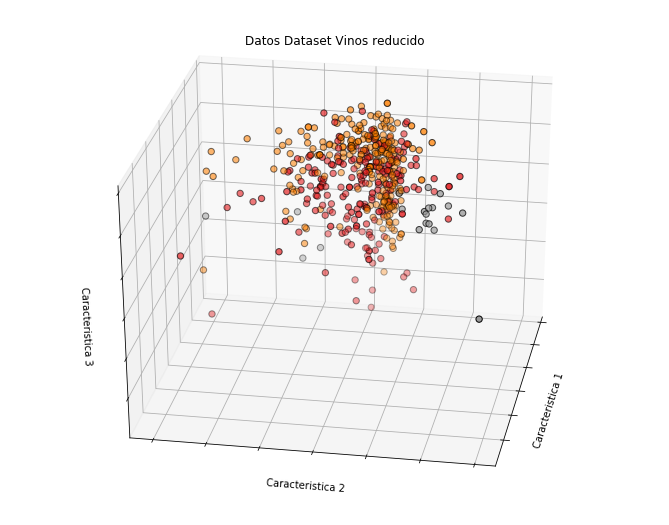


El tiempo de ejecucion fue: 0.184141 segundos

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  0   0   3  14   0   0]
 [  0   0 100  84  11   0]
 [  0   0  87 107   6   0]
 [  0   0  12  47   2   0]
 [  0   0   1   5   0   0]]


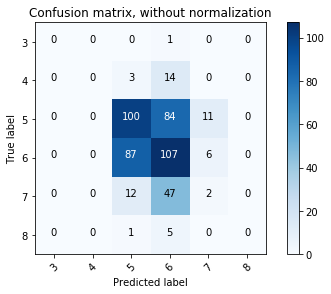

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.49      0.51      0.50       195
          6       0.41      0.54      0.47       200
          7       0.11      0.03      0.05        61
          8       0.00      0.00      0.00         6

avg / total       0.39      0.44      0.41       480



In [28]:
print "Valores Promedio para obtener un vino calidad 6 \n" 
print promedios_calidad

# tomo tiempo del test
tiempo_inicial = time() 

#########################################
#### Clasifico con los datos de Test ####
#########################################
print "\nUtilizamos SVM para clasificar los vinos con un Kernel Polinomial \n"
Z = clasificador_svc.predict(X_test) 
print Z


# grafico
fig = plt.figure(1, figsize=(9, 7))
ax = Axes3D(fig, elev=-150, azim=170)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=Z,cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Datos Dataset Vinos reducido")
ax.set_xlabel("Caracteristica 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Caracteristica 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Caracteristica 3")
ax.w_zaxis.set_ticklabels([])
plt.show()

# tomo tiempo
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial

print '\nEl tiempo de ejecucion fue: %f segundos\n' % (tiempo_ejecucion)

# por ultimo usamos metricas para comparar lo predecido con los datos de testeo.
cnf_matrix = confusion_matrix(y_test, Z)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

plt.show()

print(classification_report(y_test, Z, class_names))


In [16]:
rf = RandomForestClassifier() 

#########################################
#### Entreno con los datos de Prueba ####
#########################################
print "Entrenando Random Forest... \n" 
tiempo_inicial = time() 

clasificador_rf = rf.fit(X_train, y_train) 

tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print '\nEl tiempo de entrenamiento fue: %f segundos\n' % (tiempo_ejecucion)

Entrenando Random Forest... 


El tiempo de entrenamiento fue: 0.033317 segundos




Utilizamos Random Forest para clasificar los vinos 

[5 5 5 6 6 5 5 6 6 6 6 6 6 6 6 7 6 6 5 5 5 6 5 5 7 6 5 5 5 5 5 5 6 6 6 4 6
 5 6 6 6 4 6 5 6 7 6 6 5 6 5 6 4 7 5 5 6 5 6 5 5 6 5 5 7 6 6 5 5 6 6 5 5 6
 6 5 6 5 5 5 5 6 5 6 5 5 5 6 6 5 7 5 4 5 5 7 5 6 5 6 6 6 5 7 5 7 6 5 5 5 6
 5 7 5 6 7 5 5 5 6 5 7 6 5 6 6 6 6 5 6 5 5 5 6 6 5 6 5 6 6 5 4 7 5 5 5 5 6
 5 5 6 4 5 5 5 5 5 5 6 5 7 5 5 4 6 6 6 6 5 5 5 4 7 5 7 5 5 5 5 5 7 6 5 6 5
 5 5 5 7 5 6 6 5 6 6 5 5 6 6 7 5 5 5 5 6 5 5 5 5 6 5 5 5 6 6 5 6 6 6 6 5 6
 5 5 5 5 6 6 5 5 5 5 6 4 5 7 5 5 6 5 6 6 5 7 6 7 5 5 6 5 6 6 6 6 6 5 5 6 5
 6 6 5 5 6 6 6 5 5 6 6 5 6 6 6 6 5 6 6 6 6 6 5 6 5 5 7 5 4 5 6 5 7 5 6 5 6
 5 6 5 7 5 5 6 6 6 6 5 5 6 7 6 7 6 6 6 6 5 5 6 5 6 6 6 6 5 5 6 5 5 5 5 7 5
 6 6 6 5 7 6 6 6 6 4 5 6 5 6 6 6 6 6 7 5 6 6 6 6 5 6 5 5 5 4 6 5 6 6 5 5 7
 5 4 5 5 5 6 6 5 5 6 6 6 5 6 5 7 6 5 5 5 6 5 5 5 6 6 8 6 6 6 6 5 6 5 6 6 6
 6 6 6 5 6 6 5 5 7 5 6 6 5 5 5 5 5 6 5 6 5 7 5 7 6 5 6 7 5 5 5 5 5 6 6 5 5
 6 5 5 5 6 5 7 6 6 5 6 6 6 5 5 6 5 6 5 5 6 5 6

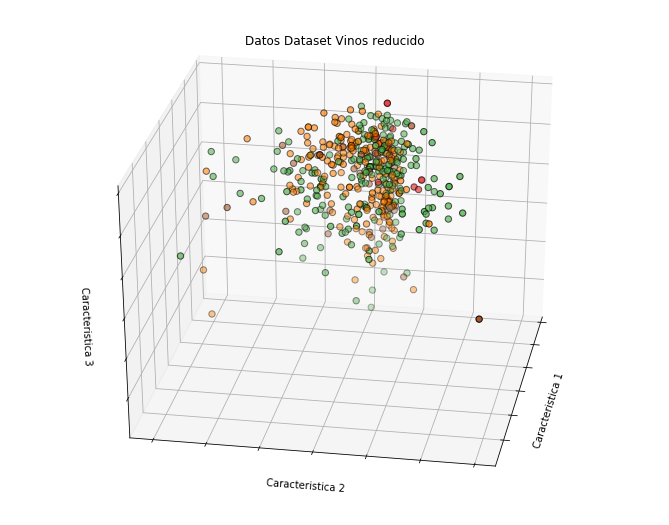


El tiempo de ejecucion fue: 0.002244 segundos

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  0   0   9   7   1   0]
 [  0   9 130  54   1   1]
 [  0   3  72 116   9   0]
 [  0   1   8  27  25   0]
 [  0   0   1   2   2   1]]


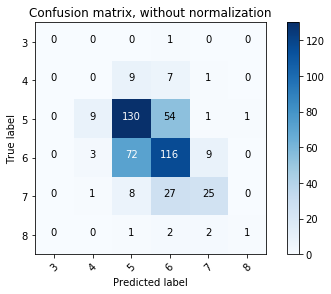

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.59      0.67      0.63       195
          6       0.56      0.58      0.57       200
          7       0.66      0.41      0.51        61
          8       0.50      0.17      0.25         6

avg / total       0.56      0.57      0.56       480



In [29]:
# tomo tiempo del entrenamiento y el test
tiempo_inicial2 = time() 

#########################################
#### Clasifico con los datos de Test ####
#########################################
predict = rf.predict(X_test)

tiempo_final2 = time() 
tiempo_ejecucion2 = tiempo_final2 - tiempo_inicial2

print "\nUtilizamos Random Forest para clasificar los vinos \n"
print predict


# grafico
fig = plt.figure(1, figsize=(9, 7))
ax = Axes3D(fig, elev=-150, azim=170)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=predict,cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Datos Dataset Vinos reducido")
ax.set_xlabel("Caracteristica 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Caracteristica 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Caracteristica 3")
ax.w_zaxis.set_ticklabels([])
plt.show()



print '\nEl tiempo de ejecucion fue: %f segundos\n' % (tiempo_ejecucion2)

# por ultimo usamos metricas para comparar lo predecido con los datos de testeo.
cnf_matrix = confusion_matrix(y_test, predict)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

plt.show()

print(classification_report(y_test, predict, class_names))


Para poder clasificar el Dataset de las calidades de los Vinos utilizamos dos metodos, SVM con un kernel Polinomial y Random Forest, luego aplicamos PCA para reducir el numero de caracteristicas del dataset a las 3 mas representativas para tener menos carga de datos al procesar, observando la matriz de confusion y el reporte de clasificacion generado por los dos metodos podemos llegar a la siguiente conclusion :

Con el metodo SVM podemos ver que clasifica mal, de forma incorrecta las clases 3, 4 y 8, esto puede ocurrir por que al entrenar no habian suficientes datos de esas clases. Las clases 5, 6 y 7 las reconoce pero tiene un nivel de acierto muy bajo, muchas veces confundiendo una clase con otra al clasificar, estos datos los podemos corroborar si miramos las metricas obtenidas por el reporte de clasificacion que me da una precision del modelo del 39% lo que es muy bajo, me da un recall (probabilidad de que si una clase debe ser clasificada como X, esta decision se tome) del 44% y un f1-score (la efectividad del modelo) del 41%.

Por otro lado con Random Forest al mirar su matriz de confusion vemos que tambien falla al clasificar pero en menor medida que SVM, clasifica mal las clases 3, 4 y 8 seguramente por falta de entrenamiento y las clases 5, 6 y 7 las reconoce y acierta mas que SVM pero sin llegar a reconocer de manera correcta las clases. Mirando su reporte de clasificacion vemos que la precision del modelo es mayor que en SVM, el 56% de precision, con un recall del 57% y un f1-score del 56%.

Los dos metodos no estan clasificando de forma correcta, pero podemos observar que Random Forest tien un desempeño un poco mas efectivo.

 